IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READ DATASETS

In [2]:
# read files and make one dataframe
df1=pd.read_csv('dataset_1.csv')
df2=pd.read_csv('dataset_2.csv')
df3=pd.read_csv('dataset_3.csv')
df=pd.concat([df1, df2, df3], ignore_index=True)

EXPLORING DATA

In [3]:
df.sample(15)

,Unnamed: 0,index,date,amount,transaction_id,rate,flat_fee,product
28589,28589,141576,21/12/2022 11:48:31,1865,pp_1671623311014783865,0.025,2.0,pp
35294,35294,123861,11/07/2021 14:30:34,164,pp_1626013834247211164,0.025,2.0,pp
130353,130353,107516,18/05/2022 10:50:43,834,pr_1652871042977137834,0.030,0.0,pr
128895,128895,104698,04/04/2022 10:50:30,188,pr_1649069429635822188,0.030,0.0,pr
33470,33470,138679,11/10/2022 16:43:36,1337,pp_1665506615611399337,0.025,2.0,pp
99942,99942,60514,11/10/2022 10:20:34,142,pos_1665483634389667142,0.010,2.0,pos
107530,107530,77930,19/12/2022 13:22:12,168,pos_1671456131726977168,0.010,2.0,pos
132665,132665,138176,28/09/2022 10:26:46,1517,pp_1664360805684757517,0.025,2.0,pp
62863,62863,65957,05/11/2022 05:33:50,152,pos_1667626429684360152,0.010,2.0,pos
88978,88978,27072,11/07/2022 11:01:16,201,pos_1657537275751588201,0.010,2.0,pos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142010 entries, 0 to 142009
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      142010 non-null  int64  
 1   index           142010 non-null  int64  
 2   date            142010 non-null  object 
 3   amount          142010 non-null  int64  
 4   transaction_id  142010 non-null  object 
 5   rate            140787 non-null  float64
 6   flat_fee        140787 non-null  float64
 7   product         142010 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 8.7+ MB


In [5]:
df.nunique()

Unnamed: 0        142010
index             142010
date              124412
amount              3535
transaction_id    124634
rate                   3
flat_fee               2
product                3
dtype: int64

DATA CLEANING

In [6]:
#validate date type and choose year 2021 only
df['date'] = pd.to_datetime(df['date'])
df_2021 = df[df['date'].dt.year == 2021]

In [7]:
#checking amount values
df_2021['amount'].describe()

count    3.329500e+04
mean     1.031458e+08
std      1.206273e+09
min      5.000000e+00
25%      1.410000e+02
50%      5.040000e+02
75%      1.253000e+03
max      3.212323e+10
Name: amount, dtype: float64

In [8]:
# sort amount column to find outliers
df_2021=df_2021.sort_values('amount',ascending=False)
top_amounts=df_2021.head(15)
top_amounts

,Unnamed: 0,index,date,amount,transaction_id,rate,flat_fee,product
32260,32260,124552,2021-08-16 13:11:49,32123232323,pp_1629119509402532298,0.025,2.0,pp
106538,106538,83649,2021-10-02 18:13:43,31232323238,pr_1612980823415370988,0.030,0.0,pr
8897,8897,89129,2021-06-14 14:29:29,31123232323,pr_1623680968904613198,0.030,0.0,pr
123613,123613,90090,2021-04-07 15:10:58,31123232323,pr_1625411458131356198,0.030,0.0,pr
133031,133031,87277,2021-05-05 08:48:55,30123232323,pr_1620204534916616098,0.030,0.0,pr
2,2,89439,2021-06-20 03:27:30,29123232323,pr_1624159650069115998,0.030,0.0,pr
88056,88056,85386,2021-03-22 06:30:06,29123232323,pr_1616394605976132998,0.030,0.0,pr
11663,11663,89382,2021-06-19 22:14:07,27123232323,pr_1624140847393238798,0.030,0.0,pr
126294,126294,122999,2021-05-18 04:05:14,27123232323,pp_1621310714253272798,0.025,2.0,pp
92845,92845,89913,2021-06-30 21:56:49,26123232323,pr_1625090209106376698,0.030,0.0,pr


In [9]:
#delete all rows with amount bigger than 500K because there is no online payment bigger than 500K
df_2021=df_2021.loc[df['amount'] < 500000]

In [10]:
df_2021['amount'].describe()

count    32785.000000
mean       762.476986
std        768.469269
min          5.000000
25%        139.000000
50%        484.000000
75%       1212.000000
max       4941.000000
Name: amount, dtype: float64

In [11]:
#delete unnecessary columns
df_2021=df_2021.drop(df_2021.columns[0], axis=1)
df_2021=df_2021.drop('index',axis=1)

In [12]:
#checking for null values
df_2021.isnull().sum()

date              0
amount            0
transaction_id    0
rate              0
flat_fee          0
product           0
dtype: int64

In [13]:
#checking for duplicated rows
df.duplicated().sum()

0

In [14]:
#add two columns to rate fee and total fees
df_2021['rate_fee']=df_2021['amount']*df_2021['rate'] 
df_2021['total_fees']=df_2021['flat_fee']+df_2021['rate_fee'] 

In [15]:
#sort data by date
df_2021.sort_values(by='date', inplace=True)
df_2021

,date,amount,transaction_id,rate,flat_fee,product,rate_fee,total_fees
72359,2021-01-01 00:11:30,79,pos_1609459889978113079,0.010,2.0,pos,0.79,2.79
22413,2021-01-01 00:29:00,900,pr_1609460939891215900,0.030,0.0,pr,27.00,27.00
47631,2021-01-01 00:43:41,391,pr_1609461820704721391,0.030,0.0,pr,11.73,11.73
135293,2021-01-01 03:14:48,637,pr_1609470887933563637,0.030,0.0,pr,19.11,19.11
44004,2021-01-01 03:20:11,1312,pr_1609471211063515312,0.030,0.0,pr,39.36,39.36
...,...,...,...,...,...,...,...,...
135174,2021-12-31 19:15:19,186,pp_1640978118911381186,0.025,2.0,pp,4.65,6.65
25344,2021-12-31 19:49:42,92,pos_1640980182137432092,0.010,2.0,pos,0.92,2.92
134593,2021-12-31 21:00:53,1948,pp_1640984452514475948,0.025,2.0,pp,48.70,50.70
49712,2021-12-31 21:00:56,111,pos_1640984455618540111,0.010,2.0,pos,1.11,3.11


DATA   ANALYSE AND VISULAIZATION

In [16]:
df_2021.groupby('product')['total_fees'].describe()

,count,mean,std,min,25%,50%,75%,max
product,,,,,,,,
pos,9540.0,3.141918,0.781593,2.050,2.510,3.030,3.64,6.66
pp,6133.0,29.800726,19.637249,2.125,13.775,26.425,42.40,112.90
pr,17112.0,29.958527,22.710367,0.150,11.730,25.110,43.53,148.23


In [17]:
#find total fees by each product
total_fees = df_2021.groupby('product')['total_fees'].sum()
flat_fees_by_product = df_2021.groupby('product')['flat_fee'].sum()
rate_fees_by_product = df_2021.groupby('product')['rate_fee'].sum()
total_fees,flat_fees_by_product,rate_fees_by_product

(product
 pos     29973.90
 pp     182767.85
 pr     512650.32
 Name: total_fees, dtype: float64,
 product
 pos    19080.0
 pp     12266.0
 pr         0.0
 Name: flat_fee, dtype: float64,
 product
 pos     10893.90
 pp     170501.85
 pr     512650.32
 Name: rate_fee, dtype: float64)

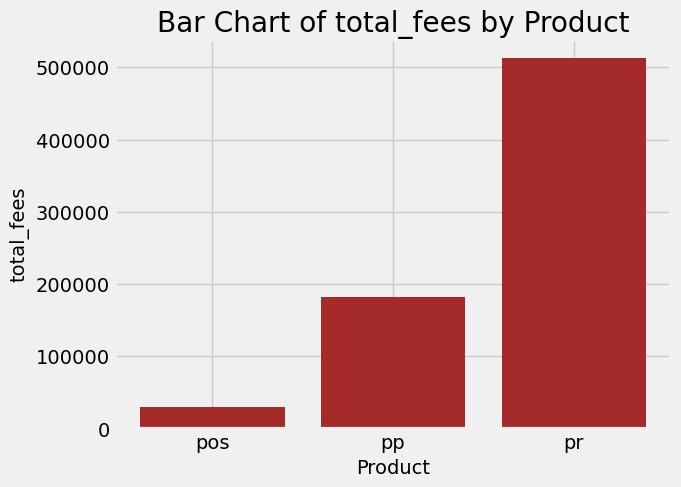

In [18]:
#bar chart of total_fees by each product
plt.style.use("fivethirtyeight")
plt.bar(total_fees.index,total_fees,color="brown")
plt.xlabel('Product')
plt.ylabel('total_fees')
plt.title('Bar Chart of total_fees by Product')
plt.tight_layout
plt.show()

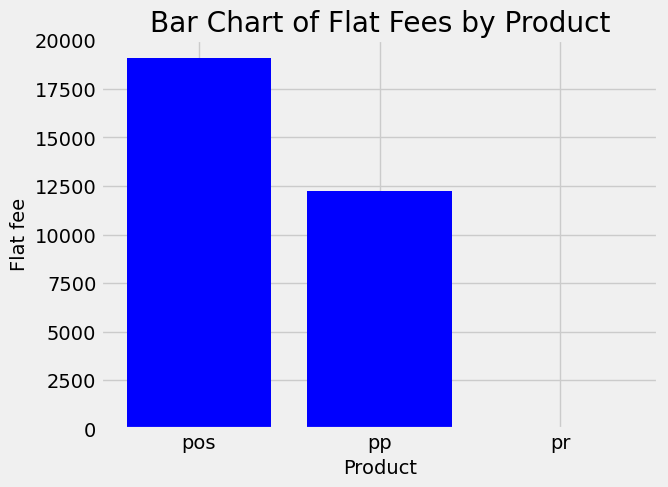

In [19]:
#bar chart of flat fees by each product
plt.style.use("fivethirtyeight")
plt.bar(flat_fees_by_product.index, flat_fees_by_product,color='b')
plt.xlabel('Product')
plt.ylabel('Flat fee')
plt.title('Bar Chart of Flat Fees by Product')
plt.tight_layout
plt.show()

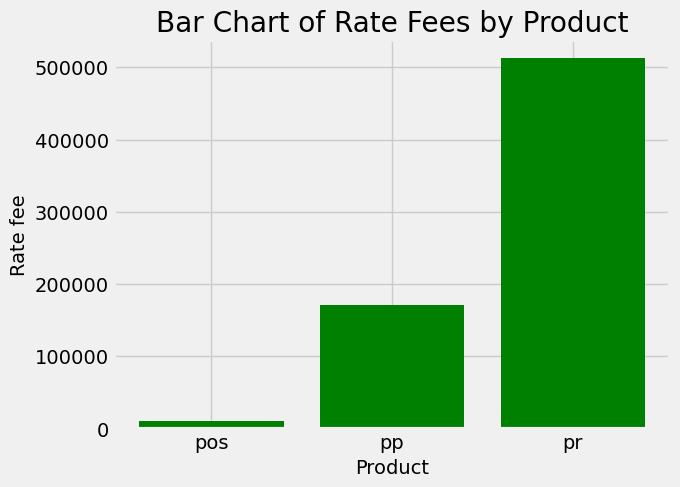

In [20]:
# bar chart of rate fees by each product
plt.style.use("fivethirtyeight")
plt.bar(rate_fees_by_product.index, rate_fees_by_product,color="g")
plt.xlabel('Product')
plt.ylabel('Rate fee')
plt.title('Bar Chart of Rate Fees by Product')
plt.tight_layout
plt.show()

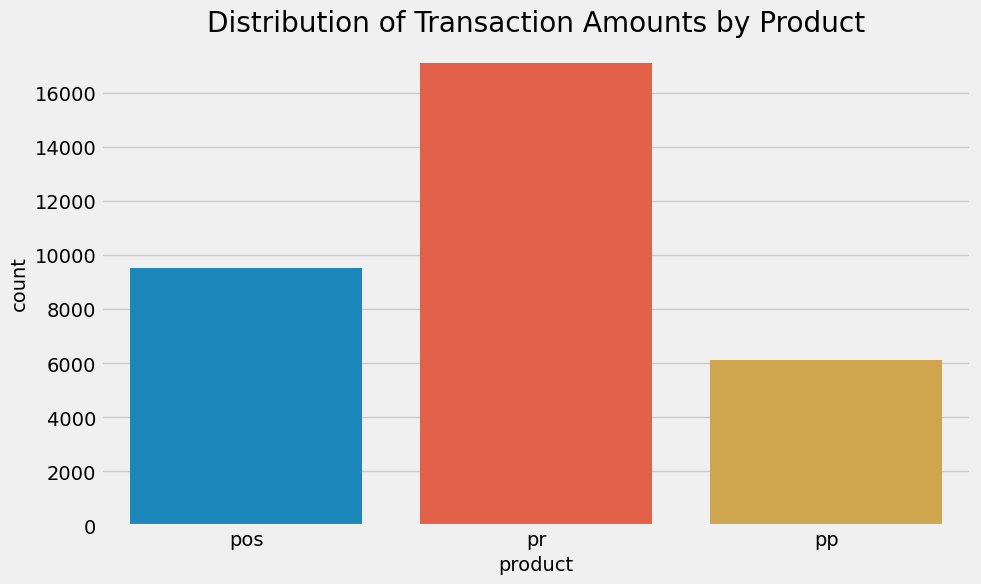

In [21]:
# Plot histogram of transaction amounts for each product
plt.figure(figsize=(10,6))
sns.countplot(x='product', data=df_2021)
plt.title('Distribution of Transaction Amounts by Product')
plt.show()

<Axes: xlabel='product', ylabel='total_fees'>

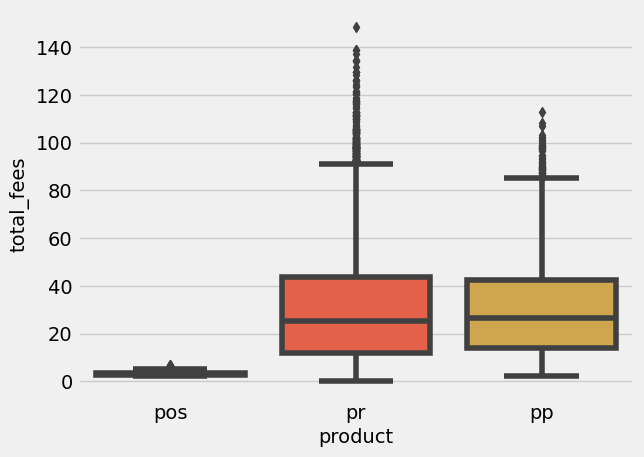

In [22]:
#  boxplot to compare the revenue distributions of products.
sns.boxplot(x='product',y='total_fees',data=df_2021)

C:\Users\Ahmed Cyber\AppData\Local\Temp\ipykernel_10712\3303839449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_2021.corr()


<Axes: >

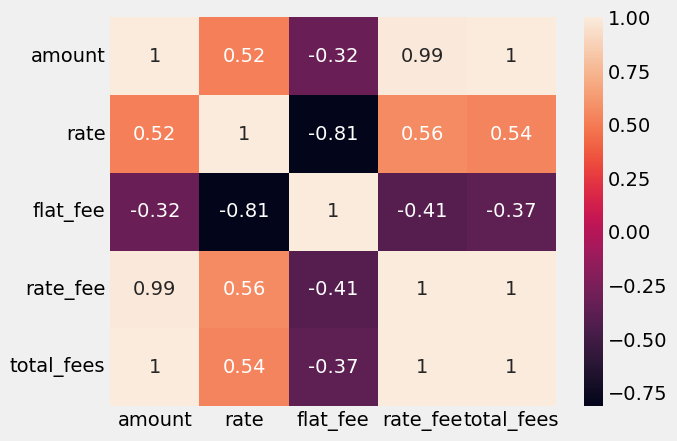

In [23]:
# explore the relationships between different numerical variables in the DataFrame
corr = df_2021.corr()
sns.heatmap(corr, annot=True)

In [24]:
#filter data to calculate growth rate
month_12 = df_2021[(df_2021['date'].dt.month == 12)] 
month_1 =  df_2021[(df_2021['date'].dt.month == 1)]

In [25]:
#find total fees for each product for January and December
total_sales_month_12 = month_12.groupby("product")["total_fees"].sum()
total_sales_month_1 = month_1.groupby("product")["total_fees"].sum()

In [26]:
#calculate growth_rate for each product
growth_rate = (total_sales_month_12-total_sales_month_1)/total_sales_month_1 *100
growth_rate

product
pos    175.141630
pp      90.476212
pr      17.566784
Name: total_fees, dtype: float64

In [27]:
df_2021.to_csv('new_data1.csv')

FINAL REPORT